✅ Data Loaded Successfully!
Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 

/tmp/ipython-input-3739551963.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1



❌ Missing values:
0


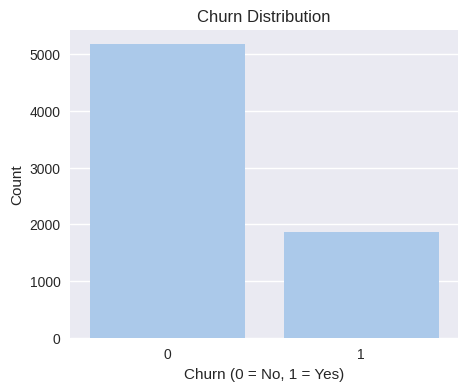

📈 Overall Churn Rate: 26.54%


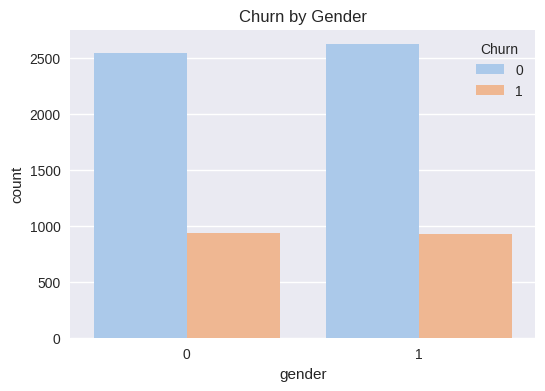

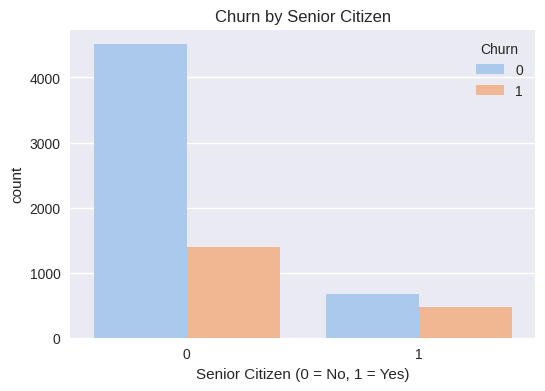

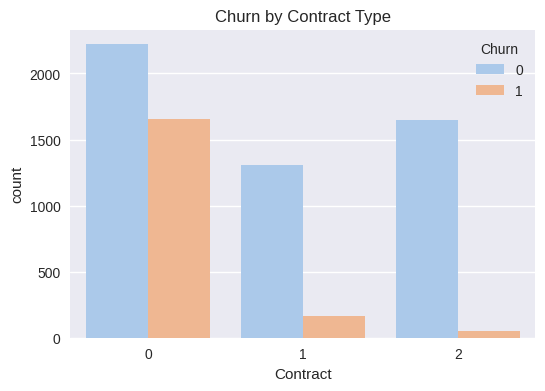

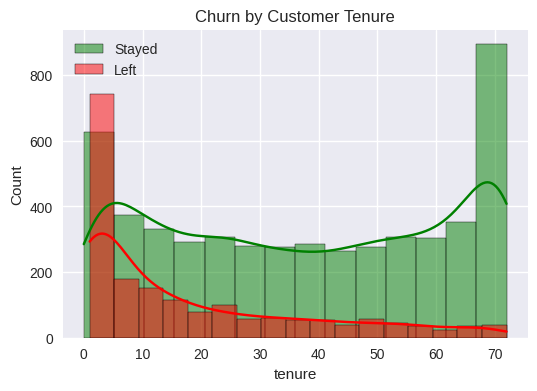

✅ Training set: (5634, 19)
✅ Test set: (1409, 19)
✅ Model training completed!
📈 Accuracy: 0.8161816891412349

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



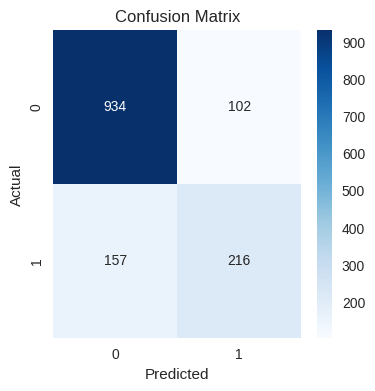

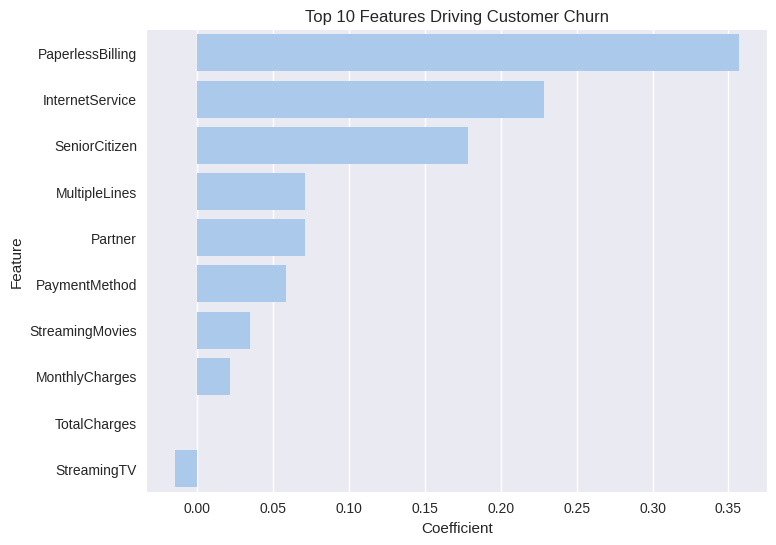

✅ Model Accuracy: 0.82

Confusion Matrix:
 [[934 102]
 [157 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



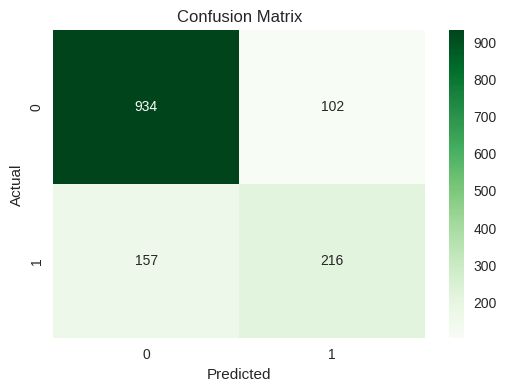

/tmp/ipython-input-3739551963.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance.head(10), palette='viridis')


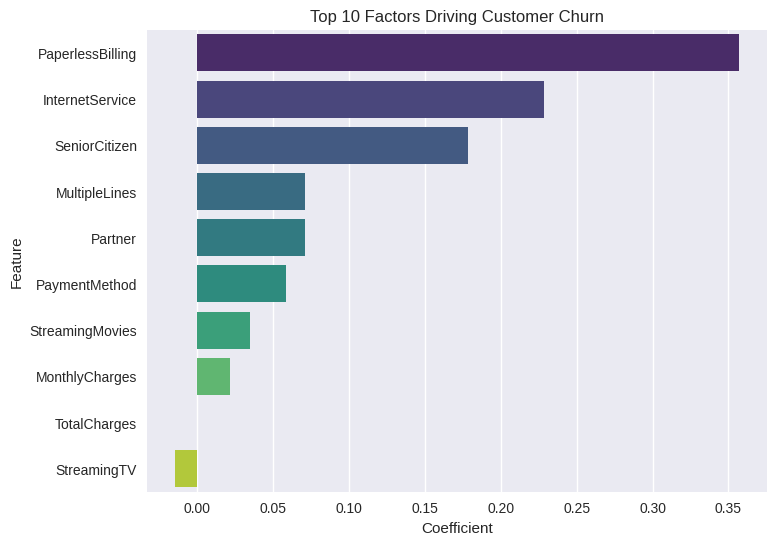

In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

# Step 2: Load dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)


# Step 3: Basic info
print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()

# Check missing values
df.isnull().sum()

# Check data types and unique values
df.info()
df.nunique()

# Convert 'TotalCharges' to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with 0 or median (better for prediction)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.drop('customerID', axis=1, inplace=True)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


df.head()
df.info()

print("✅ Data shape:", df.shape)
print("\n📋 Data types:")
print(df.dtypes)
print("\n🔍 First 5 rows:")
display(df.head())
print("\n❌ Missing values:")
print(df.isnull().sum().sum())



plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

churn_rate = df['Churn'].mean() * 100
print(f"📈 Overall Churn Rate: {churn_rate:.2f}%")


plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.show()



plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()



plt.figure(figsize=(6,4))
sns.histplot(df[df['Churn']==0]['tenure'], color='green', label='Stayed', kde=True)
sns.histplot(df[df['Churn']==1]['tenure'], color='red', label='Left', kde=True)
plt.legend()
plt.title('Churn by Customer Tenure')
plt.show()



#Logistic Regression

from sklearn.model_selection import train_test_split

# Separate target (Churn) and features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Training set:", X_train.shape)
print("✅ Test set:", X_test.shape)


#TRAINING

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)

model.fit(X_train, y_train)

print("✅ Model training completed!")

#PREDICTION

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Driving Customer Churn')
plt.show()


#Model Evaluation & Insights

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Important Features (Top Predictors)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(10), palette='viridis')
plt.title('Top 10 Factors Driving Customer Churn')
plt.show()






In [4]:
import os

# List all files in the content directory
for f in os.listdir('/content'):
    print(f)



.config
sample_data


In [2]:
import os

# Define the source and destination paths
source_path = '/WA_Fn-UseC_-Telco-Customer-Churn.csv' # Assuming the file is in the root directory
destination_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Use shell command to move the file
!mv {source_path} {destination_path}

# List files in /content to verify the move
print("Files in /content after moving:")
for f in os.listdir('/content'):
    print(f)

Files in /content after moving:
.config
WA_Fn-UseC_-Telco-Customer-Churn.csv
sample_data
